# Binary Logistic Regression in Python

## Load the iris dataset

In [1]:
from __future__ import print_function # for python 2 and 3 compatibility

import pandas as pd
df_iris = pd.read_csv('iris.csv', header=None,
                      names=['sepal_length', 'sepal_width', 'label_str'])

# add bias feature
df_iris['bias'] = 1

# make column with binary label
str_to_int = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df_iris['label_int'] = df_iris['label_str'].apply(lambda label_str: str_to_int[label_str])
df_iris.tail()

,sepal_length,sepal_width,label_str,bias,label_int
145,6.7,3.0,Iris-virginica,1,2
146,6.3,2.5,Iris-virginica,1,2
147,6.5,3.0,Iris-virginica,1,2
148,6.2,3.4,Iris-virginica,1,2
149,5.9,3.0,Iris-virginica,1,2


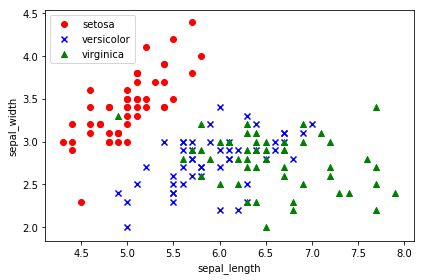

In [2]:
# plot the iris dataset

import matplotlib.pyplot as plt
import numpy as np

# plot data

plt.scatter(df_iris.iloc[:50, 0], df_iris.iloc[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(df_iris.iloc[50:100, 0], df_iris.iloc[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.scatter(df_iris.iloc[100:150, 0], df_iris.iloc[50:100, 1],
            color='green', marker='^', label='virginica')

plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [3]:
from sklearn.model_selection import train_test_split

# select data, features, labels
X = df_iris[['sepal_length', 'sepal_width', 'bias']]
y = df_iris['label_int']
X, y = X[:100], y[:100] # use 2 labels only (binary classification)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Sklearn Implementation

In [11]:
from sklearn.linear_model import LogisticRegression

# instantiate and fit model
model = LogisticRegression()
model = model.fit(X_train, y_train)

print('Coefficients:', model.coef_, 'Bias:', model.intercept_)

Coefficients: [[ 2.00234022 -3.1690261  -0.49654228]] Bias: [-0.49654228]


In [5]:
# evaluate model
train_acc =  model.score(X_train, y_train)
test_acc =  model.score(X_test, y_test)
print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))

Train accuracy: 0.985714285714
Test accuracy: 1.0
